In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pysolar.solar import *
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [6]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_csv('dadostratados.csv', index_col=0)
df = df.drop(columns=['Mês do ano'])
df = df.dropna()

df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
display(df)

# Dados de localização
latitude = 37.7510
longitude = -97.8220



,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),Irradiação Direta Média (W/m²),Ângulo Solar (Graus),Ângulo Azimutal (Graus),Chuva Acumulada em 1h (mm),Dia do Ano,Ano,Mês,Dia,Hora,Minuto
TIMESTAMP,,,,,,,,,,,,,,,,,
16-05-16 08:30,24.42,71.58,0.0,0.900,335.400,274.3,164.2,110.1,-26.172459,32.369475,0.000000e+00,137,2016,5,16,8,30
16-05-16 08:31,24.56,71.52,0.0,0.970,332.800,266.3,167.0,99.3,-26.066152,32.604196,0.000000e+00,137,2016,5,16,8,31
16-05-16 08:32,24.58,71.04,0.0,0.980,13.760,298.5,170.6,127.9,-25.959164,32.838319,0.000000e+00,137,2016,5,16,8,32
16-05-16 08:33,24.65,70.70,0.0,0.843,1.690,367.5,175.7,191.8,-25.851499,33.071844,0.000000e+00,137,2016,5,16,8,33
16-05-16 08:34,24.87,70.76,0.0,0.846,6.615,400.2,178.7,221.5,-25.743160,33.304769,0.000000e+00,137,2016,5,16,8,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19-04-17 08:02,23.26,73.32,0.0,0.750,219.700,181.5,125.8,55.7,-36.478808,28.349362,2.398082e-14,109,2017,4,19,8,2
19-04-17 08:03,23.12,72.78,0.0,0.568,291.100,216.0,120.1,95.9,-36.384286,28.630573,2.398082e-14,109,2017,4,19,8,3
19-04-17 08:04,23.15,72.64,0.0,0.379,236.000,290.6,116.1,174.5,-36.288913,28.910997,2.398082e-14,109,2017,4,19,8,4


In [7]:
df.columns

Index(['Temperatura Média (²C)', 'Humidade Relativa Máx (%)',
       'índice Pluviométrico (mm)', 'Velocidade do Vento Média (m/s)',
       'Direção do Vento (Graus)', 'Irradiação Global Média (W/m²)',
       'Irradiação Difusa Média (W/m²)', 'Irradiação Direta Média (W/m²)',
       'Ângulo Solar (Graus)', 'Ângulo Azimutal (Graus)',
       'Chuva Acumulada em 1h (mm)', 'Dia do Ano', 'Ano', 'Mês', 'Dia', 'Hora',
       'Minuto'],
      dtype='object')

In [46]:
# dataframe para 1h

# Média/acc das últimas 12h
df['DNI 12h mean'] = df['Irradiação Direta Média (W/m²)'].rolling(720).mean()
df['T 12h mean'] = df['Temperatura Média (²C)'].rolling(720).mean()
df['Rain 12h acc'] = df['Chuva Acumulada em 1h (mm)'].rolling(12).sum()
df['P 12h mean'] = df['BP_kPa_Avg'].rolling(720).mean()
df['RH 12h mean'] = df['RH_Max'].rolling(720).mean()

# Média/acc das últimas 6h
df['DNI 6h mean'] = df['DNI'].rolling(360).mean()
df['T 6h mean'] = df['AirTC_Avg'].rolling(360).mean()
df['Rain 6h acc'] = df['Rain_mm_Tot'].rolling(360).sum()
df['P 6h mean'] = df['BP_kPa_Avg'].rolling(360).mean()
df['RH 6h mean'] = df['RH_Max'].rolling(360).mean()

# Média/acc das últimas 3h
df['DNI 3h mean'] = df['DNI'].rolling(120).mean()
df['T 3h mean'] = df['AirTC_Avg'].rolling(120).mean()
df['Rain 3h acc'] = df['Rain_mm_Tot'].rolling(120).sum()
df['P 3h mean'] = df['BP_kPa_Avg'].rolling(120).mean()
df['RH 3h mean'] = df['RH_Max'].rolling(120).mean()

# Média/acc da última 1h
df['DNI 1h mean'] = df['DNI'].rolling(60).mean()
df['T 1h mean'] = df['AirTC_Avg'].rolling(60).mean()
df['Rain 1h acc'] = df['Rain_mm_Tot'].rolling(60).sum()
df['P 1h mean'] = df['BP_kPa_Avg'].rolling(60).mean()
df['RH 1h mean'] = df['RH_Max'].rolling(60).mean()

# Média/acc dos últimos 30m
df['DNI 30m mean'] = df['DNI'].rolling(30).mean()
df['T 30m mean'] = df['AirTC_Avg'].rolling(30).mean()
df['Rain 30m acc'] = df['Rain_mm_Tot'].rolling(30).sum()
df['P 30m mean'] = df['BP_kPa_Avg'].rolling(30).mean()
df['RH 30m mean'] = df['RH_Max'].rolling(30).mean()

# Média/acc dos últimos 5m
df['DNI 5m mean'] = df['DNI'].rolling(5).mean()
df['T 5m mean'] = df['AirTC_Avg'].rolling(5).mean()
df['Rain 5m acc'] = df['Rain_mm_Tot'].rolling(5).sum()
df['P 5m mean'] = df['BP_kPa_Avg'].rolling(5).mean()
df['RH 5m mean'] = df['RH_Max'].rolling(5).mean()

# Soma de toda a DNI em 12h (Em MJ/m²)
# df['DNI acc 12h'] = df['DNI'].rolling(720).sum()*60/1000000

# Target será o valor instantâneo de DNI
df['Target'] = df['DNI']

df = df.dropna()
display(df)

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,T 30m mean,Rain 30m acc,P 30m mean,RH 30m mean,DNI 5m mean,T 5m mean,Rain 5m acc,P 5m mean,RH 5m mean,Target
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-05-16 16:30:00-03:00,2016-05-16 16:30:00-03:00,644189,23.81,24.74,24.78,24.68,0.026,67.00,66.83,0.0,...,25.076333,0.000000e+00,100.9,65.266000,4.923950e-13,24.766,0.000000e+00,100.9,66.862,0.0
2016-05-16 16:31:00-03:00,2016-05-16 16:31:00-03:00,644190,23.81,24.79,24.89,24.75,0.033,66.96,66.66,0.0,...,25.055333,0.000000e+00,100.9,65.377000,4.923950e-13,24.762,0.000000e+00,100.9,66.888,0.0
2016-05-16 16:32:00-03:00,2016-05-16 16:32:00-03:00,644191,23.78,24.92,25.02,24.82,0.054,66.66,65.98,0.0,...,25.035667,0.000000e+00,100.9,65.488333,4.923950e-13,24.788,0.000000e+00,100.9,66.862,0.0
2016-05-16 16:33:00-03:00,2016-05-16 16:33:00-03:00,644192,23.78,25.12,25.26,25.02,0.068,65.98,65.23,0.0,...,25.021000,0.000000e+00,100.9,65.588333,4.923950e-13,24.862,0.000000e+00,100.9,66.692,0.0
2016-05-16 16:34:00-03:00,2016-05-16 16:34:00-03:00,644193,23.78,25.37,25.50,25.23,0.074,65.19,64.34,0.0,...,25.015667,0.000000e+00,100.9,65.653000,4.923950e-13,24.988,0.000000e+00,100.9,66.358,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-19 05:02:00-03:00,2017-04-19 05:02:00-03:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,22.644333,2.486900e-14,101.9,74.802667,1.306600e+02,23.036,4.884981e-15,101.9,73.496,55.7
2017-04-19 05:03:00-03:00,2017-04-19 05:03:00-03:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,22.658000,2.486900e-14,101.9,74.760667,1.227400e+02,23.084,4.884981e-15,101.9,73.224,95.9
2017-04-19 05:04:00-03:00,2017-04-19 05:04:00-03:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,22.676000,2.486900e-14,101.9,74.715333,1.318000e+02,23.132,4.884981e-15,101.9,73.034,174.5


In [47]:
# Selecionando o Target
y = df.Target

# Selecionando as Features
#features = ['T 6h mean','Rain 6h acc', 'P 6h mean', 'DNI 12h mean', 'T 12h mean', 'Rain 12h acc', 'P 12h mean', 'Angle', 'DNI 6h mean', 'DNI 12h mean', 'DNI acc 12h', 'Azimuth', 'RH 12h mean', 'RH 6h mean']

# Sem o DNI
features = [ 'T 12h mean', 'P 12h mean', 'RH 12h mean', 'Rain 12h acc',
            'T 6h mean', 'P 6h mean', 'RH 6h mean', 'Rain 6h acc',
            'T 3h mean','P 3h mean', 'RH 3h mean', 'Rain 3h acc',
            'T 1h mean','P 1h mean', 'RH 1h mean', 'Rain 1h acc',
            'T 30m mean','P 30m mean', 'RH 30m mean', 'Rain 30m acc',
            'T 5m mean','P 5m mean', 'RH 5m mean', 'Rain 5m acc',
            'Angle', 'Azimuth']
X = df[features]

# Separando o treino da validação do modelo
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [48]:
print('Features')
display(X)
print('Target')
display(y)

Features


,T 12h mean,P 12h mean,RH 12h mean,Rain 12h acc,T 6h mean,P 6h mean,RH 6h mean,Rain 6h acc,T 3h mean,P 3h mean,...,T 30m mean,P 30m mean,RH 30m mean,Rain 30m acc,T 5m mean,P 5m mean,RH 5m mean,Rain 5m acc,Angle,Azimuth
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-05-16 16:30:00-03:00,29.946569,100.998333,48.734111,0.000000e+00,29.879556,100.818889,47.658556,0.000000e+00,26.080917,100.886667,...,25.076333,100.9,65.266000,0.000000e+00,24.766,100.9,66.862,0.000000e+00,67.128111,220.705297
2016-05-16 16:31:00-03:00,29.950708,100.997778,48.716778,0.000000e+00,29.854167,100.819167,47.742778,0.000000e+00,26.055333,100.887500,...,25.055333,100.9,65.377000,0.000000e+00,24.762,100.9,66.888,0.000000e+00,66.998709,221.211223
2016-05-16 16:32:00-03:00,29.955153,100.997222,48.700542,0.000000e+00,29.829139,100.819444,47.824861,0.000000e+00,26.029833,100.888333,...,25.035667,100.9,65.488333,0.000000e+00,24.788,100.9,66.862,0.000000e+00,66.868000,221.712245
2016-05-16 16:33:00-03:00,29.960056,100.996667,48.684250,0.000000e+00,29.805556,100.819722,47.906944,0.000000e+00,26.005917,100.889167,...,25.021000,100.9,65.588333,0.000000e+00,24.862,100.9,66.692,0.000000e+00,66.736006,222.208398
2016-05-16 16:34:00-03:00,29.965458,100.996111,48.666528,0.000000e+00,29.783333,100.820000,47.985611,0.000000e+00,25.984833,100.890000,...,25.015667,100.9,65.653000,0.000000e+00,24.988,100.9,66.358,0.000000e+00,66.602751,222.699720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-19 05:02:00-03:00,21.219181,101.769861,81.050389,6.217249e-14,20.746056,101.757500,84.357694,4.440892e-14,21.371667,101.852500,...,22.644333,101.9,74.802667,2.486900e-14,23.036,101.9,73.496,4.884981e-15,-36.478808,28.349362
2017-04-19 05:03:00-03:00,21.220375,101.770000,81.049583,6.217249e-14,20.752611,101.758056,84.327917,4.440892e-14,21.396583,101.853333,...,22.658000,101.9,74.760667,2.486900e-14,23.084,101.9,73.224,4.884981e-15,-36.384286,28.630573
2017-04-19 05:04:00-03:00,21.221653,101.770139,81.048264,6.217249e-14,20.759250,101.758611,84.297194,4.440892e-14,21.421917,101.854167,...,22.676000,101.9,74.715333,2.486900e-14,23.132,101.9,73.034,4.884981e-15,-36.288913,28.910997


Target


TIMESTAMP
2016-05-16 16:30:00-03:00      0.0
2016-05-16 16:31:00-03:00      0.0
2016-05-16 16:32:00-03:00      0.0
2016-05-16 16:33:00-03:00      0.0
2016-05-16 16:34:00-03:00      0.0
                             ...  
2017-04-19 05:02:00-03:00     55.7
2017-04-19 05:03:00-03:00     95.9
2017-04-19 05:04:00-03:00    174.5
2017-04-19 05:05:00-03:00    204.6
2017-04-19 05:06:00-03:00    232.7
Name: Target, Length: 304469, dtype: float64

In [49]:
# Aplicação do modelo e cálculo da MAE
rf_model = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_model.fit(train_X, train_y)
predictions = rf_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(f'MAE: {mae}')


MAE: 10.387301453664048


In [50]:
# Tabela de comparação estimado vs medida
tabela_comparativa = pd.DataFrame(val_y)
tabela_comparativa['Prediction'] = predictions
tabela_comparativa['Error'] = abs(tabela_comparativa['Prediction'] - tabela_comparativa['Target'])

tabela_comparativa = tabela_comparativa.sort_index()
display(tabela_comparativa)
tabela_comparativa.describe()

,Target,Prediction,Error
TIMESTAMP,,,
2016-05-16 16:44:00-03:00,0.0,0.0000,0.0000
2016-05-16 16:54:00-03:00,0.0,0.0000,0.0000
2016-05-16 16:58:00-03:00,0.0,0.0000,0.0000
2016-05-16 16:59:00-03:00,0.0,0.0000,0.0000
2016-05-16 17:02:00-03:00,0.0,0.0000,0.0000
...,...,...,...
2017-04-19 04:49:00-03:00,23.5,28.3480,4.8480
2017-04-19 04:50:00-03:00,30.2,29.2760,0.9240
2017-04-19 04:55:00-03:00,42.0,40.1940,1.8060


,Target,Prediction,Error
count,76118.000000,76118.000000,76118.000000
mean,120.467526,120.398841,10.387301
std,239.291510,234.276024,38.341772
min,-4.690000,-5.103000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.006580,0.009670
75%,73.700000,91.135500,2.509900
max,1015.900000,1011.922000,820.704000


slope: 0.965481, intercept: 4.089744
R-squared: 0.972493
Mean Absolute Error (MAE): 10.387301 MJ/m²
Root Mean Squared Error (RMSE): 39.723648 MJ/m²
Relative Root Mean Squared Error (rRMSE): 32.974569 
Features utilizadas: 
- T 12h mean
- P 12h mean
- RH 12h mean
- Rain 12h acc
- T 6h mean
- P 6h mean
- RH 6h mean
- Rain 6h acc
- T 3h mean
- P 3h mean
- RH 3h mean
- Rain 3h acc
- T 1h mean
- P 1h mean
- RH 1h mean
- Rain 1h acc
- T 30m mean
- P 30m mean
- RH 30m mean
- Rain 30m acc
- T 5m mean
- P 5m mean
- RH 5m mean
- Rain 5m acc
- Angle
- Azimuth


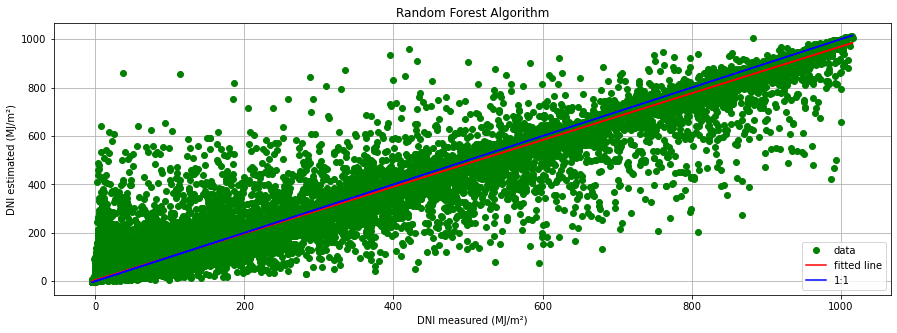

In [51]:
# Análise dos resultados
y= tabela_comparativa['Prediction']
x= tabela_comparativa['Target']

rmse = mean_squared_error(y, x)**(1/2)
media_medidas = float(tabela_comparativa['Target'].mean())

rrmse = (rmse*100)/(media_medidas)


# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean Absolute Error (MAE): %f MJ/m²" % mae)
print("Root Mean Squared Error (RMSE): %f MJ/m²" % rmse)
print("Relative Root Mean Squared Error (rRMSE): %f " % rrmse)
print("Features utilizadas: ")
for feature in features:
    print('- ' + feature)

plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='data', c='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, x, 'b', label='1:1')
plt.title("Random Forest Algorithm")
plt.xlabel("DNI measured (MJ/m²)")
plt.ylabel("DNI estimated (MJ/m²)")
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:xlabel='TIMESTAMP'>

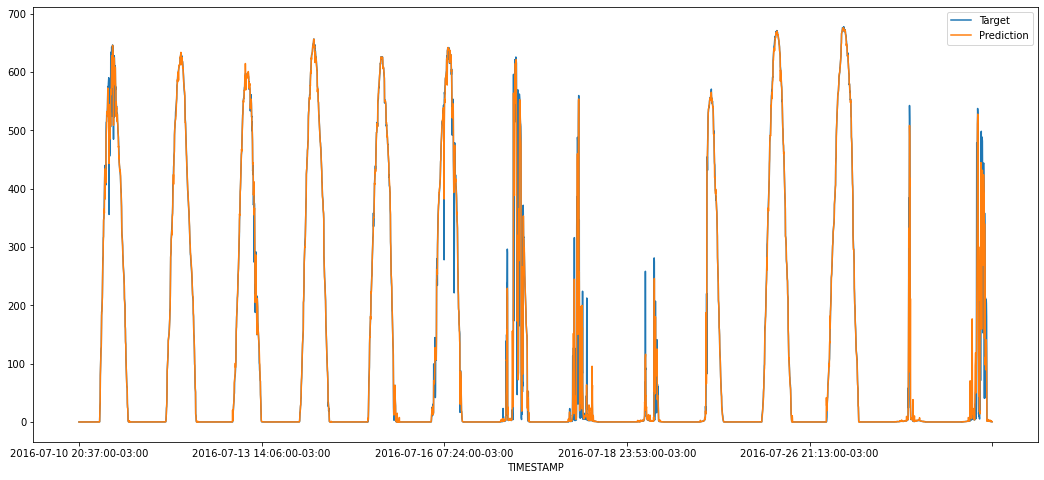

In [52]:
tabela_comparativa[20000:25000].plot(y=['Target', 'Prediction'], figsize=[18,8])